# Cold Storage scraping

In [1]:
from selenium import webdriver #for automatically controlling web browsers
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.common.by import By
import selenium.webdriver.support.expected_conditions as ec
from bs4 import BeautifulSoup
import pandas as pd
import time
import re

In [ ]:
url = "https://coldstorage.com.sg/mum-baby"

In [ ]:
driver = webdriver.Chrome("chromedriver.exe")
driver.get(url)

In [ ]:
start = 0
stop = 4000

for i in range(20):
    driver.execute_script("window.scrollTo({}, {});".format(str(start),str(stop)))
    start += 4000
    stop += 4000
    time.sleep(1)

In [ ]:
driver.execute_script("window.scrollTo(0, 0);")

In [ ]:
def scrollTillBottom(howMany,stop,increment):
    start = 0

    for i in range(howMany):
        driver.execute_script("window.scrollTo({}, {});".format(str(start),str(stop)))
        start += increment
        stop += increment
        time.sleep(1)
        
    #driver.execute_script("window.scrollTo(0, 0);")

In [ ]:
all_products = driver.find_elements_by_xpath("//div[@class='product_box']")

In [ ]:
product_info = [i.text for i in all_products]

In [ ]:
len(product_info)

In [ ]:
test1 = product_info[-1].split('\n')
len(test1)

In [ ]:
test2 = product_info[0].split('\n')
test2.insert(1,"NO DISCOUNT")
test2.append("IN STOCK")
test2

In [ ]:
'OUT OF STOCK' in product_info[0].split('\n')

In [ ]:
processed_pinfo = []

for product in product_info:
    temp = product.split('\n')
    if 'OUT OF STOCK' not in temp[0] and len(temp) == 4:
        temp.insert(1,"NO DISCOUNT/PROMOTION")
        temp.append("IN STOCK")
        processed_pinfo.append(temp)
    elif 'OUT OF STOCK' not in temp[0] and len(temp) == 5:
        temp.append("IN STOCK")
        processed_pinfo.append(temp)
    elif 'OUT OF STOCK' in temp[0] and len(temp) == 7:
        processed_pinfo.append(temp[1:])
    elif 'OUT OF STOCK' in temp[0] and len(temp) == 6:
        temp = temp[1:]
        temp.insert(1,"NO DISCOUNT/PROMOTION")
        processed_pinfo.append(temp2)
    else:
        processed_pinfo.append(temp)

In [ ]:
#
cold_storage_tkb = pd.DataFrame.from_records(processed_pinfo,columns=["price","discount_promotion","brand","name","size","stock"])

In [ ]:
cold_storage_tkb.head(10)

In [ ]:
cold_storage_tkb.tail(10)

In [ ]:
cold_storage_tkb.price = cold_storage_tkb.price.apply(lambda x: float(x.replace("$","")))

In [27]:
def tryReplace(x,target,toWhat):
    try:
        return x.replace(target,toWhat)
    except:
        return x

In [ ]:
cold_storage_tkb["size"] = cold_storage_tkb["size"].apply(lambda x: tryReplace(x,"Size: ",""))

In [ ]:
cold_storage_tkb.to_excel("sg_cold_storage_tkb.xlsx")

### just realised in the middle of fair price scraping that I should have scraped cold storage by sub category so consolidated all of the stuff above in a loop and tried again lmao

In [ ]:
#couldn't be bothered to get links from the page with selenium so just did this, will have to figure it out eventually
cs_tkb_urls = {
    #'baby-milk':'https://coldstorage.com.sg/mum-baby/baby-milk',
    #'diapers-wipes':'https://coldstorage.com.sg/mum-baby/diapers-wipes',
    #'baby-food':'https://coldstorage.com.sg/mum-baby/baby-food',
    'baby-toiletries-laundry':'https://coldstorage.com.sg/mum-baby/baby-toiletries-laundry',
    'milk-for-mums':'https://coldstorage.com.sg/mum-baby/milk-for-mums',
    'accesories':'https://coldstorage.com.sg/mum-baby/accesories',
    'infant-powder':'https://coldstorage.com.sg/mum-baby/infant-powder'
}

In [ ]:
driver = webdriver.Chrome("chromedriver.exe")

In [ ]:
for k in cs_tkb_urls.keys():
    print(k)
    temp_url = cs_tkb_urls[k]
    print(temp_url)
    print("-----going to url-----")
    driver.get(temp_url)
    time.sleep(3)
    print("-----scrolling------")
    keepScrolling()
    print("-----getting info-----")
    all_products = driver.find_elements_by_xpath("//div[@class='product_box']")
    product_info = [i.text for i in all_products]
    processed_pinfo = []
    print("------cleaning info------")
    for product in product_info:
        temp = product.split('\n')
        if 'OUT OF STOCK' not in temp[0] and len(temp) == 4:
            temp.insert(1,"NO DISCOUNT/PROMOTION")
            temp.append("IN STOCK")
            temp.append(k)
            processed_pinfo.append(temp)
        elif 'OUT OF STOCK' not in temp[0] and len(temp) == 5:
            temp.append("IN STOCK")
            temp.append(k)
            processed_pinfo.append(temp)
        elif 'OUT OF STOCK' in temp[0] and len(temp) == 6:
            temp2 = temp[1:]
            temp2.insert(1,"NO DISCOUNT/PROMOTION")
            temp2.append(k)
            processed_pinfo.append(temp2)
        elif 'OUT OF STOCK' in temp[0] and len(temp) == 7:
            to_add = temp[1:].append(k)
            processed_pinfo.append(to_add)
        else:
            processed_pinfo.append(temp)
    final = list(filter(None, processed_pinfo)) 
    print("------saving info-------")
    temp_df = pd.DataFrame.from_records(final,columns=["price","discount_promotion","brand","name","size","stock","category"])
    temp_df.price = temp_df.price.apply(lambda x: float(x.replace("$","")))
    temp_df["size"] = temp_df["size"].apply(lambda x: tryReplace(x,"Size: ",""))
    temp_df.to_excel("sg_cold_storage_{}_tkb.xlsx".format(k))

# FAIR PRICE SCRAPING

In [ ]:
fp = "https://www.fairprice.com.sg/category/baby-child-toys"

In [ ]:
driver.get(fp)

In [34]:
def keepScrolling():
    SCROLL_PAUSE_TIME = 2.5

    # Get scroll height
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        # Scroll down to bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait to load page
        time.sleep(SCROLL_PAUSE_TIME)

        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

In [ ]:
fp_all_products = driver.find_elements_by_xpath("//div[@class='sc-1plwklf-7 jibnUN']")

In [ ]:
fp_product_info = [i.text for i in fp_all_products]

In [ ]:
fp_tkb_not_categorised = []
for x in fp_product_info:
    temp = x.split('\n')
    fp_tkb_not_categorised.append(temp)

In [ ]:
fp_not_categorised_tkb = pd.DataFrame.from_records(fp_tkb_not_categorised)

### the moment when I realised I should have scraped by subcategory

In [ ]:
fp_not_categorised_tkb.to_excel("didnt_wanna_waste.xlsx")

### gonna use the data I scraped from yestereday to get all the edge cases of product info to write a cleaning script to put into the final scraping script

In [14]:
all_fp_tkb_df = pd.read_excel("didnt_wanna_waste.xlsx")

In [15]:
all_fp_tkb = all_fp_tkb_df.values.tolist()

In [16]:
all_fp_tkb[0]

['$18.95', 'Pigeon Baby Wet Wipes', '6 x 80 per pack', nan, nan, nan]

In [17]:
all_fp_tkb = [[str(i) for i in row] for row in all_fp_tkb]

In [18]:
all_fp_tkb[0]

['$18.95', 'Pigeon Baby Wet Wipes', '6 x 80 per pack', 'nan', 'nan', 'nan']

In [19]:
all_fp_tkb = [[i for i in row if i != 'nan'] for row in all_fp_tkb]

In [20]:
all_fp_tkb[7]

['$5.30',
 'Abbott Grow Ready To Drink Packet Milk - Vanilla',
 '4 x 180ml',
 '•Halal']

In [21]:
all_fp_tkb[:5]

[['$18.95', 'Pigeon Baby Wet Wipes', '6 x 80 per pack'],
 ['$38.50',
  '$64.50',
  'Drypers Drypantz Pants - L (9 - 14kg)',
  '3 x 56 per pack (CTN)'],
 ['$4.30',
  '$4.95',
  'FairPrice Baby Wet Wipes - Gently Moisturising',
  '200 per pack'],
 ['$19.95', '$21.95', 'Merries Walker Pants - XXL (15 - 28kg)', '26 per pack'],
 ['$19.40', 'MamyPoko Extra Dry Pants - XXL (15 - 25kg)', '26 per pack']]

In [22]:
data_lens = set([len(i) for i in all_fp_tkb])

In [23]:
data_lens

{3, 4, 5, 6}

In [ ]:
fp_all_products = driver.find_elements_by_xpath("//div[@class='sc-1plwklf-7 jibnUN']")
fp_product_info = [i.text for i in fp_all_products]
fp_tkb_product_info_processed = []

In [24]:
fp_tkb_product_info_processed = []

In [25]:
for product in all_fp_tkb: #fp_product_info:
    temp = product #.split('\n')
    if len(temp) == 3: #if no discount and no special requirement
        temp.insert(1,"NO DISCOUNT/PROMOTION")
        temp.append("-")
        fp_tkb_product_info_processed.append(temp)
    elif len(temp) == 4: #if discount and no special requirement
        if '$' in temp[1]:
            temp.append("-")
            fp_tkb_product_info_processed.append(temp)
        else: #if no discount and special requirement
            temp.insert(1,"NO DISCOUNT/PROMOTION")
            fp_tkb_product_info_processed.append(temp)
    elif len(temp) == 5:
        if '$' in temp[1]: #if discount and has special requirement
            fp_tkb_product_info_processed.append(temp)
        else: #if no discount and two special requirements
            temp.insert(1,"NO DISCOUNT/PROMOTION")
            to_add = temp[:4]
            to_add.append(','.join(temp[4:]))
            fp_tkb_product_info_processed.append(to_add)
    elif len(temp) == 6: #if discount and has 2 special requirement
        to_add = temp[:4]
        to_add.append(','.join(temp[4:]))
        fp_tkb_product_info_processed.append(to_add)

In [32]:
final = list(filter(None, fp_tkb_product_info_processed)) 
temp_df = pd.DataFrame.from_records(final,columns=["price","price_before_discount","name","size","special_requirement"])
temp_df.price = temp_df.price.apply(lambda x: float(x.replace("$","")))
temp_df.price_before_discount = temp_df.price_before_discount.apply(lambda x: x.replace("$",""))
temp_df.special_requirement = temp_df.special_requirement.apply(lambda x: tryReplace(x,"•",""))
temp_df.to_excel("sg_fair_price_{}_tkb.xlsx")

In [46]:
#couldn't be bothered to get links from the page with selenium so just did this, will have to figure it out eventually
fp_tkb_links = {
    #'nursing-feeding':'https://www.fairprice.com.sg/category/nursing-feeding-1',
    #'baby-toiletries':'https://www.fairprice.com.sg/category/baby-toiletries---health',
    #'baby-food':'https://www.fairprice.com.sg/category/food',
    #'toys':'https://www.fairprice.com.sg/category/toys---play',
    #'diapers':'https://www.fairprice.com.sg/category/diapers-3074457345616687146-1',
    #'baby-clothing':'https://www.fairprice.com.sg/category/baby-clothing---accessories',
    #'milk-powder':'https://www.fairprice.com.sg/category/milk-powder',
    #'baby-laundry':'https://www.fairprice.com.sg/category/baby-laundry---cleaning',
    #'baby-furniture':'https://www.fairprice.com.sg/category/baby-furniture',
    #'baby-gear':'https://www.fairprice.com.sg/category/baby-gear',
    #'infant-formula':'https://www.fairprice.com.sg/category/infant-formula--1',
    'maternity-for-moms':'https://www.fairprice.com.sg/category/maternity-for-moms',
    'baby-safety':'https://www.fairprice.com.sg/category/baby-safety--1',
}

In [35]:
driver = webdriver.Chrome("chromedriver.exe")

In [47]:
for k in fp_tkb_links.keys():
    print(k)
    temp_url = fp_tkb_links[k]
    print("-----going to url-----")
    driver.get(temp_url)
    time.sleep(3)
    print("-----scrolling------")
    keepScrolling()
    print("-----getting info-----")
    fp_all_products = driver.find_elements_by_xpath("//div[@class='sc-1plwklf-7 jibnUN']")
    fp_product_info = [i.text for i in fp_all_products]
    fp_tkb_product_info_processed = []
    for product in fp_product_info:
        temp = product.split('\n')
        if len(temp) == 3: #if no discount and no special requirement
            temp.insert(1,"NO DISCOUNT/PROMOTION")
            temp.append("-")
            fp_tkb_product_info_processed.append(temp)
        elif len(temp) == 4: #if discount and no special requirement
            if '$' in temp[1]:
                temp.append("-")
                fp_tkb_product_info_processed.append(temp)
            else: #if no discount and special requirement
                temp.insert(1,"NO DISCOUNT/PROMOTION")
                fp_tkb_product_info_processed.append(temp)
        elif len(temp) == 5:
            if '$' in temp[1]: #if discount and has special requirement
                fp_tkb_product_info_processed.append(temp)
            else: #if no discount and two special requirements
                temp.insert(1,"NO DISCOUNT/PROMOTION")
                to_add = temp[:4]
                to_add.append(','.join(temp[4:]))
                fp_tkb_product_info_processed.append(to_add)
        elif len(temp) == 6: #if discount and has 2 special requirement
            to_add = temp[:4]
            to_add.append(','.join(temp[4:]))
            fp_tkb_product_info_processed.append(to_add)
        else:
            fp_tkb_product_info_processed.append(temp)
    final = list(filter(None, fp_tkb_product_info_processed)) 
    print("-------saving info-------")
    temp_df = pd.DataFrame.from_records(final,columns=["price","price_before_discount","name","size","special_requirement"])
    temp_df.price = temp_df.price.apply(lambda x: x.replace("$",""))
    temp_df.price_before_discount = temp_df.price_before_discount.apply(lambda x: x.replace("$",""))
    temp_df.special_requirement = temp_df.special_requirement.apply(lambda x: tryReplace(x,"•",""))
    temp_df.to_excel(f'sg_fair_price_{k}_tkb.xlsx',index=False)

maternity-for-moms
-----going to url-----
-----scrolling------
-----getting info-----
-------saving info-------
baby-safety
-----going to url-----
-----scrolling------
-----getting info-----
-------saving info-------


# HYPERMART

In [2]:
driver = webdriver.Chrome("chromedriver.exe")

In [5]:
hypermart_url_test = "https://shop.hypermart.co.id"

In [6]:
driver.get(hypermart_url_test)

In [7]:
driver.execute_script("updateLang('ENG')")
time.sleep(4)

In [8]:
driver.execute_script("skipSelectStore()")
time.sleep(10)

for this site I don't need to loop through the sub cats because the sub-sub categories are in the product information and I can use that to get the sub cat also I can easily manipulate how many products are shown in the page with a query element(? is that what it's called) in the url: https://shop.hypermart.co.id/hypermart/category/D25-BAYI--ANAK?sz=1000
the sz allows me to load all the products at once so no pesky loading script or stuff needed.

In [24]:
initial_scrape = driver.find_elements_by_xpath("//div[@class='col']")

In [26]:
extracting_text = [i.text for i in initial_scrape]

In [27]:
extracting_text[:10]

["TISSU UNTUK BAYI\nMAMY POKO B.WPS N.ALCHL N.PARF 52'S EC\nRP 11.290\nADD TO CART",
 'AKSESORIS BAYI\nPIGEON PP WIDE NECK 160ML W/ P-TYPE SILICONE NIPPLE\nRP 133.900\nADD TO CART',
 'AKSESORIS BAYI\nPIGEON PP WIDE NECK 240ML W/ P-TYPE SILICONE NIPPLE\nRP 148.900\nADD TO CART',
 'MAINAN BAYI\nBABY KLAS BABY TOY BATH SET DUCK RED LIPS 0517\nRP 52.900\nADD TO CART',
 "TISSU UNTUK BAYI\nMAMY POKO B. WPS N.ALCHL PARF 52'S EC\nRP 11.290\nADD TO CART",
 "Disc\n2.700\nTISSU UNTUK BAYI\nMAMY POKO B WPS AS NP 48'S PAKET 2\nRP 18.300\nRP 15.600\nADD TO CART",
 "Disc\n2.700\nTISSU UNTUK BAYI\nMAMY POKO B WPS EC NP 52'S PAKET 2\nRP 18.300\nRP 15.600\nADD TO CART",
 "Disc\n1.800\nTISSU UNTUK BAYI\nMAMY POKO B WPS A.SEPTIC N.PARF 48'S\nRP 11.290\nRP 9.490\nADD TO CART",
 'Special\n12.990\nSEREAL BAYI\nMILNA BUBUR BAYI TIM HATI AYAM BAYAM 120 GR 6+\nRP 19.190\nRP 12.990\nADD TO CART',
 'Special\n12.990\nSEREAL BAYI\nMILNA BUBUR BAYI CAH DAGING KACANG POLONG 120 GR 8+\nRP 19.190\nRP 12.990\nADD TO CAR

In [29]:
extracting_text[0].split('\n')

['TISSU UNTUK BAYI',
 "MAMY POKO B.WPS N.ALCHL N.PARF 52'S EC",
 'RP 11.290',
 'ADD TO CART']

In [54]:
hypermart_tkb_categories = {
    '0 - 6 bulan':'SUSU ANAK DAN IBU',
    '1 - 3+ tahun':'SUSU ANAK DAN IBU',
    '6 - 12 bulan':'SUSU ANAK DAN IBU',
    'susu ibu melahirkan / Mengandung': 'SUSU ANAK DAN IBU',
    'aksesoris bayi':'KEBUTUHAN BAYI',
    'mainan bayi':'KEBUTUHAN BAYI',
    'perawatan kulit bayi':'KEBUTUHAN BAYI',
    'perawatan rambut bayi':'KEBUTUHAN BAYI',
    'sabun bayi':'KEBUTUHAN BAYI',
    'tissu untuk bayi':'KEBUTUHAN BAYI',
    'biskuit bayi':'MAKANAN BAYI',
    'sereal bayi':'MAKANAN BAYI',
    'popok celana':'POPOK BAYI',
    'popok kain':'POPOK BAYI',
    'popok sekali pakai':'POPOK BAYI'
}

In [30]:
info_split = [x.split('\n') for x in extracting_text]

In [36]:
data_lens_hypermart = set([len(i) for i in info_split])
data_lens_hypermart

{4, 6, 7}

In [40]:
len_7 = [i for i in info_split if len(i)==7]
len_7[0]

['Disc',
 '2.700',
 'TISSU UNTUK BAYI',
 "MAMY POKO B WPS AS NP 48'S PAKET 2",
 'RP 18.300',
 'RP 15.600',
 'ADD TO CART']

In [41]:
len_6 = [i for i in info_split if len(i)==6]
len_6[0]

['Special',
 'Promo',
 'BISKUIT BAYI',
 'MILNA BABY BISCUIT BRS MERAH 6+ 130G',
 'RP 17.190',
 'ADD TO CART']

In [50]:
len_6[0].pop(-1)
len_6[0].append(len_6[0][-1])
len_6[0]

['Special',
 'Promo',
 'BISKUIT BAYI',
 'MILNA BABY BISCUIT BRS MERAH 6+ 130G',
 'RP 17.190',
 'RP 17.190']

In [47]:
len_4 = [i for i in info_split if len(i)==4]
len_4[0]

['AKSESORIS BAYI',
 'PIGEON PP WIDE NECK 160ML W/ P-TYPE SILICONE NIPPLE',
 'RP 133.900',
 'ADD TO CART']

In [49]:
len_4[0].pop(-1)
len_4[0]

['AKSESORIS BAYI',
 'PIGEON PP WIDE NECK 160ML W/ P-TYPE SILICONE NIPPLE',
 'RP 133.900']

showing my thought process because I didn't do so above:
 - find the types of records I scraped by length
 - decide on the data to cut, decide on data to keep and pad with null values
 - for this case remove add to cart, pad the special discount and stuff
 - for ease just add category value to end of list and reorder columns when dataframe is made

In [57]:
processed_info = []
nothing_special = ["NO DISCOUNT","NO PROMOTION"]

In [58]:
for product in info_split:
    if len(product) == 7:
        product.pop(-1)
        processed_info.append(product)
    elif len(product) == 6:
        product.pop(-1)
        product.append(product[-1])
        processed_info.append(product)
    elif len(product) == 4:
        product.pop(-1)
        product.append(product[-1])
        joined = nothing_special + product
        processed_info.append(joined)

In [61]:
for product in processed_info:
    try:
        product.append(hypermart_tkb_categories[product[2].lower()])
    except:
        product.append(product[2])

In [64]:
hypermart_tkb_df = pd.DataFrame.from_records(processed_info)

In [65]:
hypermart_tkb_df.to_excel("hypermart_tkb_products.xlsx",index=False)

I think I left out some data cleaning stuff because the language is foreign so I'll do the messier stuff through excel

I know you can translate in python with the google translate api but I just did it on excel idk I just wanted to see all of the data instead of seeing snippets on python. I did find that I messed up some of the data cleaning but it was only 2-3 cases and easily fixed.

# DANAWA

In [135]:
driver = webdriver.Chrome('chromedriver.exe')

In [4]:
danawa_url = "https://danawa.com"

In [5]:
driver.get(danawa_url)

In [13]:
#html = driver.page_source
#soup = BeautifulSoup(html, 'html.parser')

In [65]:
from selenium.webdriver import ActionChains
from selenium.webdriver.support.ui import Select

### getting subcat links

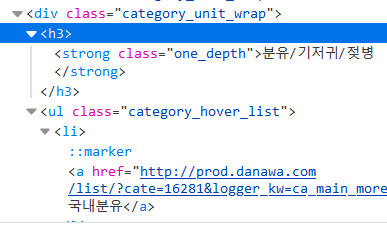

I need to get div with class called "category_unit_wrap", then the h3 under it with strong property as sub category name, then get the link and name inside the a tag 

In [22]:
actions = ActionChains(driver)

In [43]:
all_cat_btn = driver.find_element_by_css_selector('a.btn_cate_all')
all_cat_btn.click()
time.sleep(1)
dnw_tkb_btn = driver.find_element_by_css_selector('a.nav_menu08')
dnw_tkb_btn.click()

In [48]:
links = driver.find_elements_by_xpath("//a[@href]")

In [49]:
tkb_links = {}

In [50]:
for x in links:
    tkb_links[x.text] = x.get_attribute("href")

StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=87.0.4280.141)


### the hover menu disappeared but I got all the links I wanted so it's good

In [51]:
tkb_links

{'': 'http://prod.danawa.com/info/?pcode=13084526&cate1=46803&cate2=56854&cate3=56861&cate4=0&relationType=cmRecommend',
 '배너닫기': 'http://www.danawa.com/#top_banner_close_button',
 '최근본상품': 'http://www.danawa.com/#',
 '관심상품': 'http://www.danawa.com/myPage/wishList.php',
 '로그인': 'https://auth.danawa.com/login?url=http%3A%2F%2Fwww.danawa.com%2F',
 '메뉴\n카테고리 전체보기': 'http://www.danawa.com/#sectionExplodeLayer',
 '자동차': 'http://dpg.danawa.com/news/list?boardSeq=60,61,62,63,64,65,66,67,68,130&site=8',
 '조립PC': 'http://shop.danawa.com/shopmain/?logger_kw=dnw_gnb_pcmain',
 'PC견적': 'http://shop.danawa.com/virtualestimate/?controller=estimateMain&methods=index&marketPlaceSeq=16&logger_kw=dnw_gnb_esti',
 '중고장터': 'http://shop.danawa.com/shopmain/?controller=main&methods=usedMarket&logger_kw=dnw_gnb_used',
 '핫딜': 'http://prod.danawa.com/hotdeal/',
 '여행': 'http://tour.danawa.com/',
 '쇼핑기획전': 'http://plan.danawa.com/',
 'DPG': 'http://dpg.danawa.com/bbs',
 '이벤트': 'http://event.danawa.com/',
 '체험단': '

In [256]:
actual_tkb_links = {
#     '국내분유': 'http://prod.danawa.com/list/?cate=16281&logger_kw=ca_main_more',
#  '수입분유': 'http://prod.danawa.com/list/?cate=16220040&logger_kw=ca_main_more',
#  '산양-특수분유': 'http://prod.danawa.com/list/?cate=16238329&logger_kw=ca_main_more',
#  '국내기저귀': 'http://prod.danawa.com/list/?cate=16237743&logger_kw=ca_main_more',
#  '수입기저귀': 'http://prod.danawa.com/list/?cate=16239238&logger_kw=ca_main_more',
#   '기저귀용품': 'http://prod.danawa.com/list/?cate=16239253&logger_kw=ca_main_more',
#  '이유식': 'http://prod.danawa.com/list/?cate=1621080&logger_kw=ca_main_more',
#  '물티슈인기메뉴': 'http://prod.danawa.com/list/?cate=16282&logger_kw=ca_main_more',
#  '젖병-젖꼭지-소독기': 'http://prod.danawa.com/list/?cate=16239222&logger_kw=ca_main_more',
#  '휴대용유모차': 'http://prod.danawa.com/list/?cate=16238400&logger_kw=ca_main_more',
#  '절충형유모차': 'http://prod.danawa.com/list/?cate=16238401&logger_kw=ca_main_more',
#  '디럭스유모차': 'http://prod.danawa.com/list/?cate=16239185&logger_kw=ca_main_more',
#  '쌍둥이-삼륜유모차신규메뉴': 'http://prod.danawa.com/list/?cate=162147&logger_kw=ca_main_more',
#  '유모차+카시트 세트': 'http://prod.danawa.com/list/?cate=16239192&logger_kw=ca_main_more',
#  '신생아카시트': 'http://prod.danawa.com/list/?cate=16239193&logger_kw=ca_main_more',
#  '영유아용카시트인기메뉴': 'http://prod.danawa.com/list/?cate=162148&logger_kw=ca_main_more',
#  '주니어용카시트': 'http://prod.danawa.com/list/?cate=16238411&logger_kw=ca_main_more',
#  '유모차-카시트소품': 'http://prod.danawa.com/list/?cate=16221375&logger_kw=ca_main_more',
#  '아기띠-힙시트': 'http://prod.danawa.com/list/?cate=162149&logger_kw=ca_main_more',
#  '가방-미아방지용품': 'http://prod.danawa.com/list/?cate=16236671&logger_kw=ca_main_more',
#  '유아웨건': 'http://prod.danawa.com/list/?cate=16224283&logger_kw=ca_main_more',
#  '놀이방매트-안전': 'http://prod.danawa.com/list/?cate=16238392&logger_kw=ca_main_more',
#  '젖병-젖꼭지': 'http://prod.danawa.com/list/?cate=16238393&logger_kw=ca_main_more',
#  '젖병소독기-유축기': 'http://prod.danawa.com/list/?cate=162187&logger_kw=ca_main_more',
#  '이유식용품': 'http://prod.danawa.com/list/?cate=16233925&logger_kw=ca_main_more',
#  '수유용품': 'http://prod.danawa.com/list/?cate=162188&logger_kw=ca_main_more',
#  '유아욕조-목욕용품': 'http://prod.danawa.com/list/?cate=16238394&logger_kw=ca_main_more',
#  '유아변기-위생용품': 'http://prod.danawa.com/list/?cate=16238396&logger_kw=ca_main_more',
#  '출산-신생아용품': 'http://prod.danawa.com/list/?cate=16238398&logger_kw=ca_main_more',
#  '유아가구': 'http://prod.danawa.com/list/?cate=16238151&logger_kw=ca_main_more',
#  '캐릭터별완구': 'http://prod.danawa.com/list/?cate=16238419&logger_kw=ca_main_more',
#  '레고-블록': 'http://prod.danawa.com/list/?cate=16238366&logger_kw=ca_main_more',
#  '로봇-자동차-팽이인기메뉴': 'http://prod.danawa.com/list/?cate=162178&logger_kw=ca_main_more',
 '킥보드-승용완구신규메뉴': 'http://prod.danawa.com/list/?cate=162179&logger_kw=ca_main_more',
 '역할놀이-소꿉놀이': 'http://prod.danawa.com/list/?cate=16238333&logger_kw=ca_main_more',
 '너프건-스포츠완구': 'http://prod.danawa.com/list/?cate=16238342&logger_kw=ca_main_more',
 '실내대형완구': 'http://prod.danawa.com/list/?cate=16238348&logger_kw=ca_main_more',
 '학습-과학완구': 'http://prod.danawa.com/list/?cate=162181&logger_kw=ca_main_more',
 '음악-미술완구': 'http://prod.danawa.com/list/?cate=16238357&logger_kw=ca_main_more',
 '신생아-영유아완구': 'http://prod.danawa.com/list/?cate=16238376&logger_kw=ca_main_more',
 '인형': 'http://prod.danawa.com/list/?cate=16238377&logger_kw=ca_main_more',
 '코딩완구': 'http://prod.danawa.com/list/?cate=16233793&logger_kw=ca_main_more',
 '책가방-신발주머니인기메뉴': 'http://prod.danawa.com/list/?cate=162258&logger_kw=ca_main_more'
}

In [59]:
actual_tkb_links

{'국내분유': 'http://prod.danawa.com/list/?cate=16281&logger_kw=ca_main_more'}

In [210]:
def get_prod_items(prod_items):
    prod_data = []
    for prod_item in prod_items:
        #name
        try:
            title = prod_item.select("p.prod_name > a")[0].text.strip()
        except:
            title = ''
        #specs
        try:
            spec = prod_item.select("div.spec_list")[0].text.strip()
        except:
            spec = ''
        #price
        try:
            amount = prod_items[0].select('li.rank_one > div.over_preview > p.memory_sect')[0].text.replace('\t','').replace('\n','|')
        except:
            try:
                amount = prod_items[0].select('div.prod_pricelist > ul > li > div.over_preview > p.memory_sect')[0].text.replace('\t','').replace('\n','|')
            except:
                amount = ''
        try:
            price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(',','')
            price = int(price)
        except:
            price = prod_item.select('div.prod_pricelist > ul > li > p.price_sect > a > strong')[0].text.strip().replace(',','')
            try: 
                price = int(price)
            except:
                price = str(price)
        prod_data.append([title,spec,amount,price])
    return prod_data

### the code kinda fucks up once there are around 3000 pages per sub category and I have no idea why, had to resort to keyboard interrupting when there was an infinite loop and restart from where I left off

#### eventually cut off the product scraping when the script scraped over 2000 products

In [258]:
for k in actual_tkb_links.keys():
    link = actual_tkb_links[k]
    driver.get(link)
    time.sleep(3)
    
    product_per_page = Select(driver.find_element_by_css_selector('select.qnt_selector'))
    product_per_page.select_by_value('90')
    time.sleep(3)
    
    current_page = 1
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    prod_data_total = []
    find = True
#     product_num = float(soup.select('div.product_list_wrap > div.product_list_area > div.prod_list_tab > ul.tab_list')[0].text.split("(")[1].split(")")[0].replace(",",""))
#     pages = round(product_num/90)+1
    while find:
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')
        if len(prod_items) == 0 or len(prod_data_total) > 2000:
            find = False;
        else:
            prod_items_list = get_prod_items(prod_items)
            prod_data_total = prod_data_total + prod_items_list
            current_page += 1
            driver.execute_script(f"movePage({current_page})")
            time.sleep(3)
        
    data = pd.DataFrame(prod_data_total)
    data.columns = ['name','details','amount','price']
    data.to_excel('danawa_{}_result.xlsx'.format(k), index=False)
    print(k," 완료")
print("완료")

킥보드-승용완구신규메뉴  완료
역할놀이-소꿉놀이  완료
너프건-스포츠완구  완료
실내대형완구  완료
학습-과학완구  완료
음악-미술완구  완료
신생아-영유아완구  완료
인형  완료
코딩완구  완료
책가방-신발주머니인기메뉴  완료
완료


In [255]:
data = pd.DataFrame(prod_data_total)
data.columns = ['name','details','amount','price']
data.to_excel('danawa_{}_result.xlsx'.format(k), index=False)
print(k," 완료")

로봇-자동차-팽이인기메뉴  완료


In [219]:
current_page

31

In [130]:
prod_data_total

[]

In [72]:
product_per_page = Select(driver.find_element_by_css_selector('select.qnt_selector'))
product_per_page.select_by_value('90')

In [226]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [252]:
product_num = float(soup.select('div.product_list_wrap > div.product_list_area > div.prod_list_tab > ul.tab_list')[0].text.split("(")[1].split(")")[0].replace(",",""))
round(product_num/90)

42

In [177]:
prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')

In [205]:
rank_one = prod_items[0].select('li.rank_one > div.over_preview > p.memory_sect')[0].text.replace('\t','').replace('\n','|')
rank_one

'|1위|3캔|445원/10g||'

In [164]:
prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')
prod_items

[]

In [153]:
pages = soup.select('div.prod_num_nav > div.num_nav_wrap > div.number_wrap > a')

In [79]:
current_page = 1
page_count = 0

In [154]:
pages

[<a class="num now_on" href="#" onclick="return false" onmousedown="_trkEventLog('15상품리스트_페이지')">1</a>,
 <a class="num" href="#" onclick="javascript:movePage(2); return false;" onmousedown="_trkEventLog('15상품리스트_페이지')">2</a>,
 <a class="num" href="#" onclick="javascript:movePage(3); return false;" onmousedown="_trkEventLog('15상품리스트_페이지')">3</a>,
 <a class="num" href="#" onclick="javascript:movePage(4); return false;" onmousedown="_trkEventLog('15상품리스트_페이지')">4</a>,
 <a class="num" href="#" onclick="javascript:movePage(5); return false;" onmousedown="_trkEventLog('15상품리스트_페이지')">5</a>,
 <a class="num" href="#" onclick="javascript:movePage(6); return false;" onmousedown="_trkEventLog('15상품리스트_페이지')">6</a>,
 <a class="num" href="#" onclick="javascript:movePage(7); return false;" onmousedown="_trkEventLog('15상품리스트_페이지')">7</a>,
 <a class="num" href="#" onclick="javascript:movePage(8); return false;" onmousedown="_trkEventLog('15상품리스트_페이지')">8</a>,
 <a class="num" href="#" onclick="javascri

In [157]:
len(pages)

10

In [90]:
'movePage({})'.format(str(pages[-1]).split(">")[1][0])

'movePage(3)'

In [162]:
driver.execute_script("movePage(17)")

In [93]:
current = 1
maximum = 3
test = []
while current <= maximum:
    test.append(f"foo{current}")
    current += 1
test

['foo1', 'foo2', 'foo3']

In [112]:
test = soup.select('p.price_sect > a > strong')

In [113]:
test

[<strong>81,900</strong>,
 <strong>85,900</strong>,
 <strong>85,900</strong>,
 <strong>124,100</strong>,
 <strong>124,100</strong>,
 <strong>124,100</strong>,
 <strong>30,000</strong>,
 <strong>13,300</strong>,
 <strong class="no_sale">일시품절</strong>,
 <strong>21,520</strong>,
 <strong>104,600</strong>,
 <strong>24,000</strong>,
 <strong>32,990</strong>,
 <strong>32,990</strong>,
 <strong>15,250</strong>,
 <strong>15,250</strong>,
 <strong>129,800</strong>,
 <strong>19,900</strong>,
 <strong>24,000</strong>,
 <strong>192,600</strong>,
 <strong>12,900</strong>,
 <strong>222295</strong>]